In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Churn_Modelling.csv')


In [3]:
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe(include='all')


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [6]:
df.isnull().sum()


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# Dropping Irrelevant Features


In [7]:
df.columns


Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [8]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)


In [9]:
df.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Encoding Categorical Data


In [10]:
df = pd.get_dummies(df,drop_first = True)


In [11]:
df.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


# Some insights about the target variable


In [12]:
df['Exited'].value_counts()


0    7963
1    2037
Name: Exited, dtype: int64

<AxesSubplot: ylabel='count'>

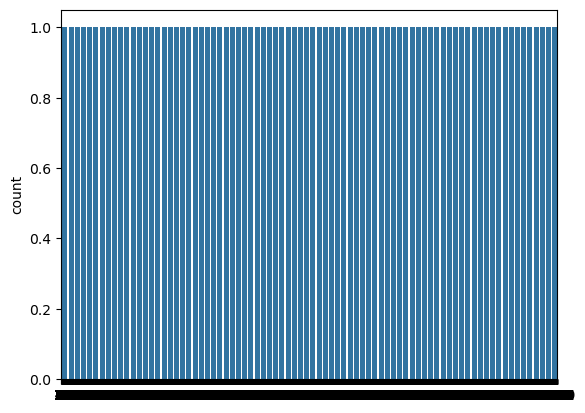

In [13]:
sns.countplot(df['Exited'])


In [14]:
X = df.drop('Exited',axis=1)
y = df['Exited']

# Handling Imbalanced Data with SMOTE


In [15]:
from imblearn.over_sampling import SMOTE


In [16]:
X_res, y_res = SMOTE().fit_resample(X,y)


In [17]:
y_res.value_counts()


1    7963
0    7963
Name: Exited, dtype: int64

<AxesSubplot: ylabel='count'>

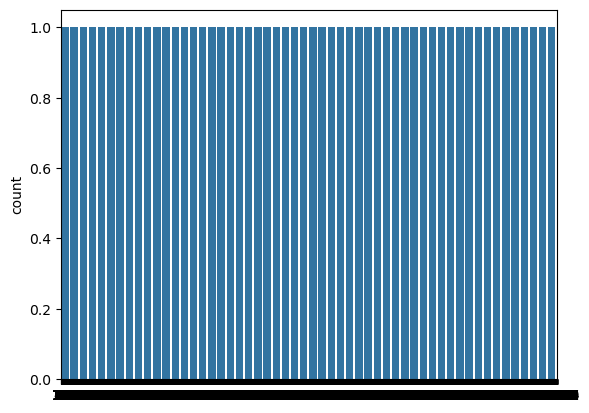

In [18]:
sns.countplot(y_res)


In [19]:
from sklearn.model_selection import train_test_split


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=47)


# Feature Scaling


In [21]:
from sklearn.preprocessing import StandardScaler


In [22]:
sc = StandardScaler()


X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
X_train


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
8157,719,32,7,0.000000,1,0,0,76264.270000,0,1,0
6844,587,33,8,148163.570000,1,0,0,122925.400000,0,0,1
4943,528,43,7,97473.870000,2,1,1,159823.160000,0,1,1
1115,479,48,5,87070.230000,1,0,1,85646.410000,0,1,1
9940,748,20,7,0.000000,2,0,0,10792.420000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6728,804,33,10,138335.960000,1,1,1,80483.760000,1,0,0
11528,607,45,4,116809.664718,1,1,0,119377.656905,0,0,0
14663,643,36,4,97375.414508,1,1,0,97555.977193,0,0,0
1926,693,31,1,0.000000,2,0,1,182270.880000,0,0,1


# Logistic Regression


In [24]:
from sklearn.linear_model import LogisticRegression


In [25]:
log = LogisticRegression()


In [26]:
log.fit(X_train, y_train)


LogisticRegression()

In [27]:
y_pred1 = log.predict(X_test)


In [28]:
from sklearn.metrics import accuracy_score


In [29]:
accuracy_score(y_test,y_pred1)


0.6791544579321892

In [30]:
from sklearn.metrics import precision_score, recall_score, f1_score


In [31]:
precision_score(y_test, y_pred1)


0.659650516282764

In [32]:
recall_score(y_test, y_pred1)


0.7107402652973898

In [33]:
f1_score(y_test,y_pred1)


0.6842430484037074

# SVC


In [34]:
from sklearn import svm


In [35]:
svm = svm.SVC()


In [36]:
svm.fit(X_train,y_train)


SVC()

In [37]:
y_pred2=svm.predict(X_test)


In [38]:
accuracy_score(y_test, y_pred2)


0.5745081624110506

In [39]:
precision_score(y_test, y_pred2)


0.5467692307692308

In [40]:
recall_score(y_test, y_pred2)


0.7603765511339324

In [41]:
f1_score(y_test,y_pred2)


0.6361195632718811

 # KNeighbors Classifier


In [42]:
from sklearn.neighbors import KNeighborsClassifier


In [43]:
knn = KNeighborsClassifier()


In [44]:
knn.fit(X_train,y_train)


KNeighborsClassifier()

In [45]:
y_pred3=knn.predict(X_test)


In [46]:
accuracy_score(y_test, y_pred3)


0.6825031393888656

In [47]:
precision_score(y_test, y_pred3)


0.6491994177583698

In [48]:
recall_score(y_test, y_pred3)


0.7633718442447582

In [49]:
f1_score(y_test,y_pred3)


0.7016715830875124